<a href="https://colab.research.google.com/github/sd1214/Spam-SMS-Detection/blob/main/Spam_SMS_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import** **Libraries**

In [1]:
import numpy as np
import pandas as pd
import csv

**Upload Dataset**

In [2]:
from google.colab import files
uploaded=files.upload()

Saving spam.csv to spam (4).csv


**View Data (first 5 and last 5)**

In [3]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


**Dataframe shape**

In [5]:
df.shape

(5572, 5)

## **Data Preprocessing**

### **Data Cleaning**

**Remove duplicate datas from dataframe** 

In [6]:
df.drop_duplicates(inplace=True)

**The new shape is (5169,5)**

> **we can infer that few data were duplicate which got removed**




In [7]:
df.shape

(5169, 5)

**Check NAN values in Dataframe** 

In [8]:
df.isnull

<bound method DataFrame.isnull of         v1  ... Unnamed: 4
0      ham  ...        NaN
1      ham  ...        NaN
2     spam  ...        NaN
3      ham  ...        NaN
4      ham  ...        NaN
...    ...  ...        ...
5567  spam  ...        NaN
5568   ham  ...        NaN
5569   ham  ...        NaN
5570   ham  ...        NaN
5571   ham  ...        NaN

[5169 rows x 5 columns]>

**Number of NAN values in each attributes**

In [9]:
print(df['v1'].isnull().sum())
print(df['v2'].isnull().sum())
print(df['Unnamed: 2'].isnull().sum())
print(df['Unnamed: 3'].isnull().sum())
print(df['Unnamed: 4'].isnull().sum())


0
0
5126
5159
5164


**Drop attributes with NAN values**

In [10]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

**Renaming 'v1'-> 'Output' and  'v2'-> 'Text'**

In [11]:
df=df.rename({'v1':'Output','v2':'Text'},axis=1)

In [12]:
df

,Output,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## **Data Visualization**

**Plot Histogram for Spam and Ham**

(array([4516.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         653.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

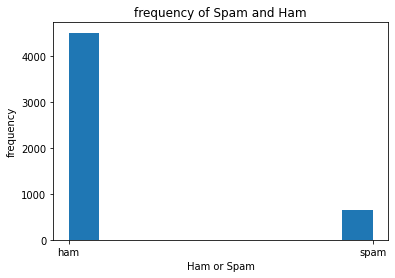

In [13]:
import matplotlib.pyplot as plt
plt.xlabel("Ham or Spam")
plt.ylabel("frequency")
plt.title("frequency of Spam and Ham")
plt.hist(df['Output'])



**Finding text length each row and add a column Text_length to the dataframe**

In [14]:
length=[]
for i in df['Text']:
   length.append(len(i))
df['Text_length']=length
df

,Output,Text,Text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161
5568,ham,Will Ì_ b going to esplanade fr home?,37
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


**Histogram of Length of text**

Text(0.5, 1.0, 'frequency of text length')

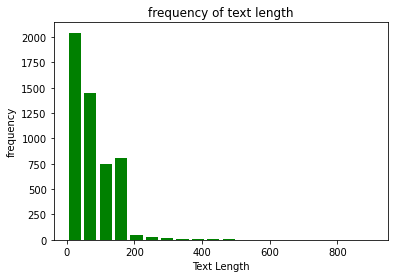

In [15]:
plt.hist(df['Text_length'],bins=20, rwidth=0.8,color='g',label="Text length")
plt.xlabel("Text Length")
plt.ylabel("frequency")
plt.title("frequency of text length")

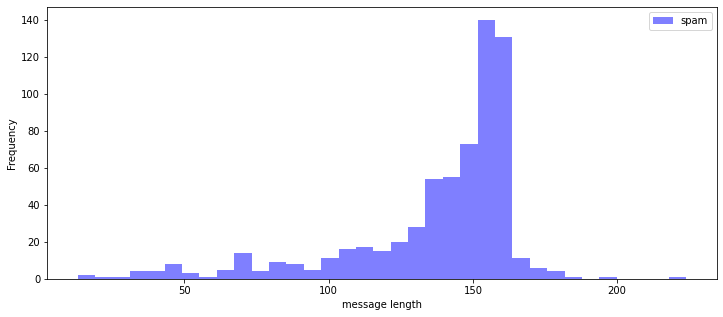

In [16]:
plt.figure(figsize=(12,5))
df[df['Output']=='spam']['Text_length'].plot(bins=35,kind='hist',color='blue',label='spam',alpha=0.5)
plt.legend()
plt.xlabel('message length')
plt.show()


**Histogram plot for Spam text length**

Text(0.5, 1.0, 'Spam text length')

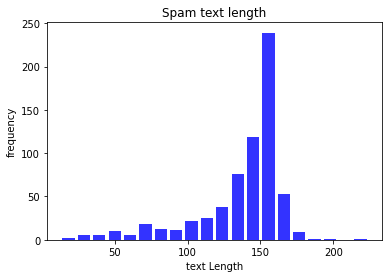

In [17]:
plt.hist(df[df['Output']=='spam']['Text_length'],bins=20,color='b',rwidth=0.8,label='spam word length',alpha=0.8)
plt.xlabel("text Length")
plt.ylabel("frequency")
plt.title("Spam text length")

**Histogram plot for Ham text length**

Text(0.5, 1.0, 'Ham text length')

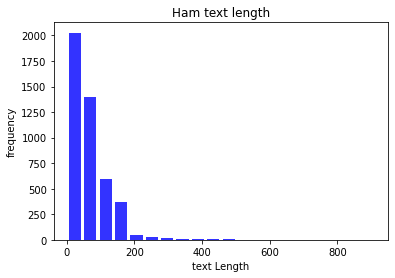

In [18]:
plt.hist(df[df['Output']=='ham']['Text_length'],bins=20,color='b',rwidth=0.8,label='Ham word length',alpha=0.8)
plt.xlabel("text Length")
plt.ylabel("frequency")
plt.title("Ham text length")

**Histogram plot representing both Spam and Ham text length**

Text(0.5, 1.0, 'Spam vs ham text length')

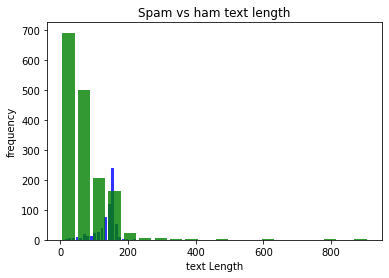

In [19]:
plt.hist(df[df['Output']=='spam']['Text_length'],bins=20,color='b',rwidth=0.8,label='spam word length',alpha=0.8)
plt.hist(df[df['Output']=='ham']['Text_length'].head(1600),bins=20,color='g',rwidth=0.8,label='spam word length',alpha=0.8)
plt.xlabel("text Length")
plt.ylabel("frequency")
plt.title("Spam vs ham text length")

In [20]:
df['Output'].value_counts()

ham     4516
spam     653
Name: Output, dtype: int64

**Since the number spam text are very less as compared to Ham text, so we will equal number of spam and ham samples from dataset and plot histogram for better analysis. Before selecting samples we will shuffle the samples**

> **By analysising the plot we can say that Spam texts are generally have higher length as compared to Ham text.**



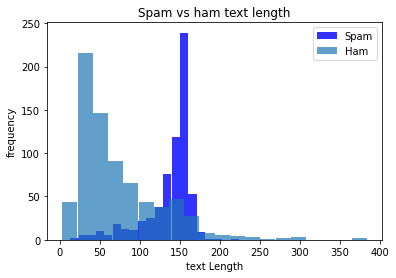

In [21]:
import math
df.sample(frac=1)
plt.hist(df[df['Output']=='spam']['Text_length'],bins=20,color='b',rwidth=0.99,alpha=0.8,label='Spam')
plt.hist(df[df['Output']=='ham']['Text_length'].head(math.ceil(5169*(653/4516))),bins=20,rwidth=0.99,alpha=0.7,label='Ham')
plt.xlabel("text Length")
plt.ylabel("frequency")
plt.title("Spam vs ham text length")
plt.legend(('Spam', 'Ham'), loc='upper right');


## **Text data Cleaning**

**Import NLTK libraries for NLP**


In [22]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

**Import modules**

In [23]:
from nltk.tokenize import word_tokenize,wordpunct_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Word tokenize function definition**

In [24]:
def tokenizer_fn(data):
    return word_tokenize(data)

**Tokenize words**

> **Tokenize the text data**



In [25]:
tokenize_text=[]
for data in df['Text']:
  tokenize_text.append(tokenizer_fn(data))
print(tokenize_text[0])

['Go', 'until', 'jurong', 'point', ',', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']


**Function to remove Stop Words and punctuations from text data**

> **Stop Words- useless words or data in NLP**



In [26]:
import string
stopWords=set(stopwords.words('english'))
def remove_stopwords_punctuations(data):
    new_data=[]
    for word in data:
      if word.lower() not in stopWords and word.lower() not in string.punctuation and word.lower().isalpha():
        new_data.append(word)
    return new_data

**Stop words and punctuations Removal**


> **Clean text by removing stop words, punctuations and non-aphabetic words from the text data**





In [27]:
new_text=[]
for data in tokenize_text:
  new_text.append(remove_stopwords_punctuations(data))
print(tokenize_text[0])
print(new_text[0])

['Go', 'until', 'jurong', 'point', ',', 'crazy..', 'Available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', '...', 'Cine', 'there', 'got', 'amore', 'wat', '...']
['Go', 'jurong', 'point', 'Available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'Cine', 'got', 'amore', 'wat']


**Stemming**

> **Convert each word in text to stem word**

> **Convert words back to string**

> **Form a New column for Cleaned text data**







In [28]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
clean_text=[]
for words in new_text:
  s=""
  for word in words:
    s=s+ps.stem(word)+" ";
  clean_text.append(s);
clean_text
df['New_Text']=clean_text

**Add a column for New text length after removing unwanted data**

In [29]:
length_=[]
for i in df['New_Text']:
   length_.append(len(i))
df['New_Text_length']=length_
df

,Output,Text,Text_length,New_Text,New_Text_length
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point avail bugi n great world la e ...,71
1,ham,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni,22
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win FA cup final tkt may ...,97
3,ham,U dun say so early hor... U c already then say...,49,U dun say earli hor U c alreadi say,36
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though,37
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,time tri contact U pound prize claim easi call...,57
5568,ham,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home,22
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest,18
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...,66


**Find correlation between old Text length and New Text length**

> **Correlation comes out to 0.996696722316739, which shows that both attributes are highly correlated**



In [30]:
from scipy.stats import pearsonr
corr, _=pearsonr(df['Text_length'],df['New_Text_length'])
print(corr)

0.9407392214925319


**Since old Text data and New Text data are having high correlation coefficient, we will drop New text length column**

In [31]:
df=df.drop(['New_Text_length'],axis=1)
df

,Output,Text,Text_length,New_Text
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point avail bugi n great world la e ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win FA cup final tkt may ...
3,ham,U dun say so early hor... U c already then say...,49,U dun say earli hor U c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,time tri contact U pound prize claim easi call...
5568,ham,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...


**Copy the data from New_Text to Text column**

In [32]:
df['Text']=df['New_Text']
df

,Output,Text,Text_length,New_Text
0,ham,Go jurong point avail bugi n great world la e ...,111,Go jurong point avail bugi n great world la e ...
1,ham,Ok lar joke wif u oni,29,Ok lar joke wif u oni
2,spam,free entri wkli comp win FA cup final tkt may ...,155,free entri wkli comp win FA cup final tkt may ...
3,ham,U dun say earli hor U c alreadi say,49,U dun say earli hor U c alreadi say
4,ham,nah think goe usf live around though,61,nah think goe usf live around though
...,...,...,...,...
5567,spam,time tri contact U pound prize claim easi call...,161,time tri contact U pound prize claim easi call...
5568,ham,b go esplanad fr home,37,b go esplanad fr home
5569,ham,piti mood suggest,57,piti mood suggest
5570,ham,guy bitch act like interest buy someth els nex...,125,guy bitch act like interest buy someth els nex...


**Drop New_text column**

In [33]:
df=df.drop(['New_Text'],axis=1)

**Correlation coefficient of Text-length and Output is found to be 0.3847170667143067**

> **so we can infer that text length and outcome(Spam or Ham) are somewhat correlated**



In [34]:
corr, _=pearsonr(df['Text_length'],df['Output'].astype('category').cat.codes)
print(corr)

0.3847170667143067


**Ham => 0**
**Spam => 1**

In [35]:
df['Output']=np.where(df['Output']=='spam',1,0)

In [36]:
X=df['Text']
Y=df['Output']

In [37]:
X

0       Go jurong point avail bugi n great world la e ...
1                                  Ok lar joke wif u oni 
2       free entri wkli comp win FA cup final tkt may ...
3                    U dun say earli hor U c alreadi say 
4                   nah think goe usf live around though 
                              ...                        
5567    time tri contact U pound prize claim easi call...
5568                               b go esplanad fr home 
5569                                   piti mood suggest 
5570    guy bitch act like interest buy someth els nex...
5571                                      rofl true name 
Name: Text, Length: 5169, dtype: object

In [38]:
df

,Output,Text,Text_length
0,0,Go jurong point avail bugi n great world la e ...,111
1,0,Ok lar joke wif u oni,29
2,1,free entri wkli comp win FA cup final tkt may ...,155
3,0,U dun say earli hor U c alreadi say,49
4,0,nah think goe usf live around though,61
...,...,...,...
5567,1,time tri contact U pound prize claim easi call...,161
5568,0,b go esplanad fr home,37
5569,0,piti mood suggest,57
5570,0,guy bitch act like interest buy someth els nex...,125


## **Feature Extraction**

**Import modules of Scikit-learn to split training and testing data**

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0,test_size=0.2)

In [40]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4135,)
(1034,)
(4135,)
(1034,)


**Feature extraction**

> **Since the available input is text data, we will extract numeric data from it**

> **We are using CountVectorizer which will count the frequency of unique words in the text**





In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [42]:
X_train=cv.fit_transform(x_train)
X_test=cv.transform(x_test)


**Check the new shape of X_train and X_test data after extracting feature from text data**
> **From the new shape we can tell that 5078 features have been extracted by applying CountVectorizer on the text input**



In [43]:
print(X_train.shape)
print(X_test.shape)

(4135, 5078)
(1034, 5078)




> **Since that features may contain many zero values for each row, so the data is stored in compressed Sparse Row format**



In [44]:
X_train

<4135x5078 sparse matrix of type '<class 'numpy.int64'>'
	with 30466 stored elements in Compressed Sparse Row format>

# **Training Models**

### **Naive Bayes Classifier**

#### **Training the model**

In [45]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train,y_train)
pred_y_train_1=nb.predict(X_train)
pred_y_test_1=nb.predict(X_test)

#### **Model Evaluation**


**On Training data**
> **Accuracy Score= 0.9876662636033857**



In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of training set for Naive Bayes\n")
print(classification_report(y_train,pred_y_train_1))
print("\nConfusion Matrix")
print(confusion_matrix(y_train,pred_y_train_1))
print("\nAccuracy Score")
print(accuracy_score(y_train,pred_y_train_1))

Classification Report of training set for Naive Bayes

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3631
           1       0.94      0.95      0.95       504

    accuracy                           0.99      4135
   macro avg       0.97      0.97      0.97      4135
weighted avg       0.99      0.99      0.99      4135


Confusion Matrix
[[3603   28]
 [  23  481]]

Accuracy Score
0.9876662636033857


**On Test data**

> **Accuracy Score= 0.9748549323017408**



In [47]:
print("Classification Report of Test set for Naive Bayes\n")
print(classification_report(y_test,pred_y_test_1))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,pred_y_test_1))
print("\nAccuracy Score")
print(accuracy_score(y_test,pred_y_test_1))

Classification Report of Test set for Naive Bayes

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       885
           1       0.96      0.87      0.91       149

    accuracy                           0.97      1034
   macro avg       0.97      0.93      0.95      1034
weighted avg       0.97      0.97      0.97      1034


Confusion Matrix
[[879   6]
 [ 20 129]]

Accuracy Score
0.9748549323017408


## **Logistic Regression**

### **Training the model**

> **With L2(default) regularization**



In [48]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression();
lgr.fit(X_train,y_train);
pred_y_train_2=lgr.predict(X_train);
pred_y_test_2=lgr.predict(X_test);

In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of training set for Logistic Regression\n")
print(classification_report(y_train,pred_y_train_2))
print("\nConfusion Matrix")
print(confusion_matrix(y_train,pred_y_train_2))
print("\nAccuracy Score")
print(accuracy_score(y_train,pred_y_train_2))

Classification Report of training set for Logistic Regression

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3631
           1       1.00      0.96      0.98       504

    accuracy                           0.99      4135
   macro avg       1.00      0.98      0.99      4135
weighted avg       0.99      0.99      0.99      4135


Confusion Matrix
[[3630    1]
 [  22  482]]

Accuracy Score
0.9944377267230955


In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of test set for Logistic Regression\n")
print(classification_report(y_test,pred_y_test_2))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,pred_y_test_2))
print("\nAccuracy Score")
print(accuracy_score(y_test,pred_y_test_2))

Classification Report of test set for Logistic Regression

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.87      0.92       149

    accuracy                           0.98      1034
   macro avg       0.99      0.93      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix
[[884   1]
 [ 20 129]]

Accuracy Score
0.9796905222437138


### **Training the model**

> **With no regularization**

In [51]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(penalty='none');
lgr.fit(X_train,y_train);
pred_y_train_2=lgr.predict(X_train);
pred_y_test_2=lgr.predict(X_test);

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of training set for Logistic Regression (with No regularization)\n")
print(classification_report(y_train,pred_y_train_2))
print("\nConfusion Matrix")
print(confusion_matrix(y_train,pred_y_train_2))
print("\nAccuracy Score")
print(accuracy_score(y_train,pred_y_train_2))

Classification Report of training set for Logistic Regression (with No regularization)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       1.00      1.00      1.00       504

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135


Confusion Matrix
[[3631    0]
 [   1  503]]

Accuracy Score
0.999758162031439


**Analysis**

> **Without regularization the model performs poorly in test data while training set accuracy is very high**



In [53]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of test set for Logistic Regression (with No regularization)\n")
print(classification_report(y_test,pred_y_test_2))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,pred_y_test_2))
print("\nAccuracy Score")
print(accuracy_score(y_test,pred_y_test_2))

Classification Report of test set for Logistic Regression (with No regularization)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       885
           1       0.79      0.87      0.83       149

    accuracy                           0.95      1034
   macro avg       0.88      0.91      0.90      1034
weighted avg       0.95      0.95      0.95      1034


Confusion Matrix
[[851  34]
 [ 20 129]]

Accuracy Score
0.9477756286266924


### **Training the model**

> **With L2 regularization with Saga solver, max_iter=10000 and inverse regularization strength=0.7**

In [54]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(penalty="l2",solver='saga',max_iter=10000,C=0.7,tol=1e-4);
lgr.fit(X_train,y_train);
pred_y_train_2=lgr.predict(X_train);
pred_y_test_2=lgr.predict(X_test);

In [55]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of training set for Logistic Regression (L2 with Saga) \n")
print(classification_report(y_train,pred_y_train_2))
print("\nConfusion Matrix")
print(confusion_matrix(y_train,pred_y_train_2))
print("\nAccuracy Score")
print(accuracy_score(y_train,pred_y_train_2))

Classification Report of training set for Logistic Regression (L2 with Saga) 

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3631
           1       1.00      0.94      0.97       504

    accuracy                           0.99      4135
   macro avg       0.99      0.97      0.98      4135
weighted avg       0.99      0.99      0.99      4135


Confusion Matrix
[[3630    1]
 [  31  473]]

Accuracy Score
0.992261185006046


In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of test set for Logistic Regression(L2 with Saga)\n")
print(classification_report(y_test,pred_y_test_2))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,pred_y_test_2))
print("\nAccuracy Score")
print(accuracy_score(y_test,pred_y_test_2))

Classification Report of test set for Logistic Regression(L2 with Saga)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       885
           1       0.99      0.87      0.93       149

    accuracy                           0.98      1034
   macro avg       0.99      0.94      0.96      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix
[[884   1]
 [ 19 130]]

Accuracy Score
0.9806576402321083


## **SVM Classifier**

### **Training the Model**



In [57]:
from sklearn import svm
svm=svm.LinearSVC()
svm.fit(X_train,y_train);
pred_y_train_3=svm.predict(X_train);
pred_y_test_3=svm.predict(X_test);

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of training set for SVM classifier \n")
print(classification_report(y_train,pred_y_train_3))
print("\nConfusion Matrix")
print(confusion_matrix(y_train,pred_y_train_3))
print("\nAccuracy Score")
print(accuracy_score(y_train,pred_y_train_3))

Classification Report of training set for SVM classifier 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       1.00      1.00      1.00       504

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135


Confusion Matrix
[[3631    0]
 [   2  502]]

Accuracy Score
0.9995163240628778


In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of test set for SVM classifier\n")
print(classification_report(y_test,pred_y_test_3))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,pred_y_test_3))
print("\nAccuracy Score")
print(accuracy_score(y_test,pred_y_test_3))

Classification Report of test set for SVM classifier

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       885
           1       0.96      0.88      0.92       149

    accuracy                           0.98      1034
   macro avg       0.97      0.94      0.95      1034
weighted avg       0.98      0.98      0.98      1034


Confusion Matrix
[[880   5]
 [ 18 131]]

Accuracy Score
0.9777562862669246


## **KNN**

### **Training the Model**

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2,weights="distance")
knn.fit(X_train,y_train);
pred_y_train_4=knn.predict(X_train);
pred_y_test_4=knn.predict(X_test);

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of training set for KNN \n")
print(classification_report(y_train,pred_y_train_4))
print("\nConfusion Matrix")
print(confusion_matrix(y_train,pred_y_train_4))
print("\nAccuracy Score")
print(accuracy_score(y_train,pred_y_train_4))

Classification Report of training set for KNN 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3631
           1       1.00      1.00      1.00       504

    accuracy                           1.00      4135
   macro avg       1.00      1.00      1.00      4135
weighted avg       1.00      1.00      1.00      4135


Confusion Matrix
[[3631    0]
 [   1  503]]

Accuracy Score
0.999758162031439


In [62]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("Classification Report of training set for KNN\n")
print(classification_report(y_test,pred_y_test_4))
print("\nConfusion Matrix")
print(confusion_matrix(y_test,pred_y_test_4))
print("\nAccuracy Score")
print(accuracy_score(y_test,pred_y_test_4))

Classification Report of training set for KNN

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       885
           1       1.00      0.61      0.76       149

    accuracy                           0.94      1034
   macro avg       0.97      0.81      0.86      1034
weighted avg       0.95      0.94      0.94      1034


Confusion Matrix
[[885   0]
 [ 58  91]]

Accuracy Score
0.9439071566731141


In [63]:
y_test

1851    0
2375    0
2743    0
3324    0
3995    0
       ..
2237    0
4368    0
3046    0
4263    0
2674    0
Name: Output, Length: 1034, dtype: int64

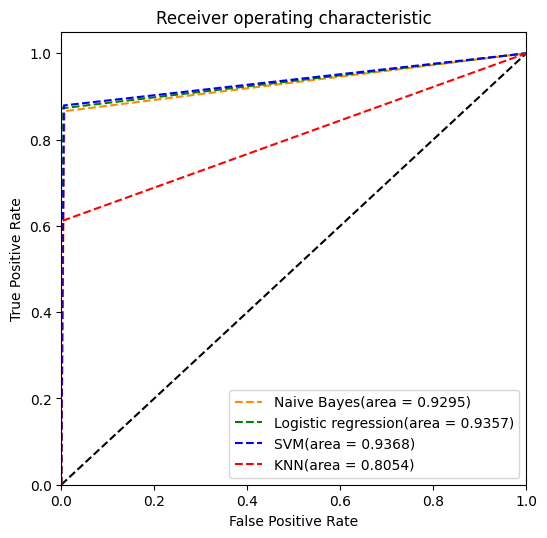

In [64]:
from sklearn.metrics import roc_curve, auc

fpr_1, tpr_1, threshold = roc_curve(y_test,pred_y_test_1,pos_label=1)
roc_auc_1 = auc(fpr_1, tpr_1)
fpr_2, tpr_2, threshold = roc_curve(y_test,pred_y_test_2,pos_label=1)
roc_auc_2 = auc(fpr_2, tpr_2)
fpr_3, tpr_3, threshold = roc_curve(y_test,pred_y_test_3,pos_label=1)
roc_auc_3 = auc(fpr_3, tpr_3)
fpr_4, tpr_4, threshold = roc_curve(y_test,pred_y_test_4,pos_label=1)
roc_auc_4 = auc(fpr_4, tpr_4)
plt.figure(figsize=(6,6),dpi=100)
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.plot(fpr_1, tpr_1, color='darkorange',linestyle='--', label='Naive Bayes(area = %0.4f)' % roc_auc_1)

plt.plot(fpr_2, tpr_2, color='green',linestyle='--', label='Logistic regression(area = %0.4f)' % roc_auc_2)

plt.plot(fpr_3, tpr_3, color='blue',linestyle='--', label='SVM(area = %0.4f)' % roc_auc_3)

plt.plot(fpr_4, tpr_4, color='red',linestyle='--', label='KNN(area = %0.4f)' % roc_auc_4)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# **Final Analysis**

> **SVM has highest AUC of ROC curve, area= 0.9368 while logistic regression  model has AUC=0.9357**

> `From above criteria both SVM and logistic regression model performed equally well`



### > **For our spam detector, we want to maximize precision of Spam and maximize recall of Ham**

> **Logistic Regression model has higher value in both precision of Spam and recall of Ham**

> **Logistic Regression model has higher accuracy (accuracy score=0.9806576402321083)**


##> **Therefore I would choose Logistic Regression model over all the above models**













